## 1. Import Data & Libraries

In [111]:
#Import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import matplotlib.pyplot as plt

In [112]:
# Load the data
df = pd.read_csv('Spotify_data.csv') 

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_38246/2252526769.py:2: DtypeWarning:

Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.



In [113]:
# Check the few rows of the data
df.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


### Let's take an inventory of what data types we have, before we think about removing any columns: 

Numerical 
- Discrete
- Continuous

Categorical
- Ordinal
- Nominal
- Binary

Other
- Date/Time (time-stamps)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375141 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375117 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

In [115]:
df.select_dtypes(['object', 'bool'])

,album_id,album_name,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,artist_id,...,genre_1,genre_2,genre_3,genre_4,analysis_url,track_href,type,uri,explicit,release_month
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/5Juc...,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,True,April
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/4VWr...,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,True,April
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/6JsV...,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,True,April
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/7pZp...,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,True,April
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,album,['AB'],AB,NaN,NaN,NaN,NaN,08jcfs5JspUBqM3rbFNUzm,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/0ylq...,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,True,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,1MPAXuTVL2Ej5x0JHiSPq8,Reputation Stadium Tour Surprise Song Playlist,album,['Taylor Swift'],Taylor Swift,NaN,NaN,NaN,NaN,06HL4z0CvFAxyc27GXpf02,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/2fF3...,https://api.spotify.com/v1/tracks/2fF3QzbGCrtr...,audio_features,spotify:track:2fF3QzbGCrtrDXIdWcg1mv,False,November
375137,6fyR4wBPwLHKcRtxgd4sGh,Speak Now World Tour Live,album,['Taylor Swift'],Taylor Swift,NaN,NaN,NaN,NaN,06HL4z0CvFAxyc27GXpf02,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/0BSm...,https://api.spotify.com/v1/tracks/0BSmbCIY36iw...,audio_features,spotify:track:0BSmbCIY36iw04azzJ3S0S,False,October
375138,7mzrIsaAjnXihW3InKjlC3,Taylor Swift,album,['Taylor Swift'],Taylor Swift,NaN,NaN,NaN,NaN,06HL4z0CvFAxyc27GXpf02,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/2QA3...,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,audio_features,spotify:track:2QA3IixpRcKyOdG7XDzRgv,False,October
375139,11gfxXxJPd3j6sdWUyEA5S,Taylor Swift Karaoke: Red,album,"['Taylor Swift', 'Ed Sheeran']",Taylor Swift,Ed Sheeran,NaN,NaN,NaN,06HL4z0CvFAxyc27GXpf02,...,NaN,NaN,NaN,NaN,https://api.spotify.com/v1/audio-analysis/5cXT...,https://api.spotify.com/v1/tracks/5cXTESo2BLCY...,audio_features,spotify:track:5cXTESo2BLCYwmUKF2uE8A,False,October


In [116]:
df.select_dtypes(['float', 'int'])

,album_popularity,duration_sec,total_tracks,track_number,artist_popularity,followers,acousticness,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,release_year,rn
0,1,92.063,8,1,0,133,0.03050,0.622,92064.0,0.554,...,0.3920,-9.505,0.0,0.4140,72.546,4.0,0.3820,0.0,2023.0,1
1,1,125.320,8,5,0,133,0.01120,0.899,125320.0,0.701,...,0.1530,-6.182,0.0,0.1380,101.581,4.0,0.1930,1.0,2023.0,1
2,1,139.800,8,3,0,133,0.08150,0.782,139800.0,0.716,...,0.1260,-8.295,0.0,0.3820,99.789,4.0,0.8350,1.0,2023.0,1
3,1,147.777,8,6,0,133,0.00413,0.944,147778.0,0.582,...,0.0961,-9.205,1.0,0.2970,105.010,4.0,0.2520,0.0,2023.0,1
4,1,102.600,8,8,0,133,0.01290,0.527,102600.0,0.641,...,0.0869,-11.173,0.0,0.7300,172.723,4.0,0.3800,0.0,2023.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,76,267.653,46,38,100,95859165,0.00556,0.547,267653.0,0.808,...,0.0587,-3.630,1.0,0.0398,139.908,4.0,0.6500,35.0,2017.0,1
375137,60,315.173,16,10,100,95859165,0.80600,0.374,315173.0,0.504,...,0.7600,-8.407,1.0,0.0392,109.025,5.0,0.2700,53.0,2010.0,1
375138,75,207.106,15,6,100,95859165,0.00491,0.589,207107.0,0.805,...,0.2400,-4.055,1.0,0.0293,112.982,4.0,0.5910,58.0,2006.0,1
375139,20,243.933,16,14,100,95859165,0.12400,0.581,243933.0,0.469,...,0.3660,-10.420,1.0,0.0621,80.048,4.0,0.2690,7.0,2012.0,1


In [117]:
# Display the unique values of each column (useful for categorical data)
df.nunique()

album_id              67991
album_name            61468
album_popularity         99
album_type                2
artists               66002
artist_0              35112
artist_1              24641
artist_2               9567
artist_3               3828
artist_4               1756
artist_id             31699
duration_sec         138290
label                 29639
release_date           7503
total_tracks            151
track_id             375141
track_name           275524
track_number             50
artist_genres          5993
artist_popularity        94
followers             12001
name                  30948
genre_0                3008
genre_1                1740
genre_2                 955
genre_3                 524
genre_4                 301
acousticness           5242
analysis_url         374364
danceability           1327
duration_ms          137997
energy                 2918
instrumentalness       5402
key                      12
liveness               1769
loudness            

## Just converted the datetimes
Numerical 
- Discrete: album_popularity, total_tracks, track_number, artist_popularity, followers, rn, key
- Continuous: duration_sec, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence, track_popularity

Categorical
- Ordinal: None
- Nominal: album_id, album_type, artists, artist_0, artist_1, artist_2, artist_3, artist_4, artist_id, label, track_id, track_name, artist_genres, name, genre_0, genre_1, genre_2, genre_3, genre_4, analysis_url, track_href, type, uri, 
- Binary: explicit, mode

Other
- Date/Time (time-stamps): release_date, release_month, release_year


In [118]:
#Let's just convert the datetimes for now
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = pd.to_datetime(df['release_month'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce')

## 2 Explore the data

1. Study some attributes and their characterists:
    - Name
    - Check for duplicates
    - % missing vsalues
    - Usefullness for the task
    - Noisness and type of noise (Stochastic, outliers, rounidng errors, etc.)
    - Type of distribution (Gaussian, uniform, logaritmic)

2. Visualize the data
    - Numerical: Histograms & Scatter Plots
    - Categorical: Bar plots
    - Both: Box plots, violin plots, colored histograms
    - Date/Time: Line plots
    What data can tell you
    - Change Over Time
    - Hierarchy Drill Down
    - Zoom in and out of granularity
    - Contrasting Values
    - Intersections
    - Different Factors contributing to a larger phenomena
    - Outliers

3. Study the correlation between attributes
    - Pearson Correlation

4. identify the promising transformation that needs to be applied

5. Create test set


#### 1. Study some attributes and their characterists:

In [119]:
## Check for duplicates in the data (row)
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  0


In [120]:
# Select the first few rows
subset = df.head()

# Transpose the subset, so that columns become rows
subset_transposed = subset.T

# Check for duplicates
duplicates = subset_transposed.duplicated()

# Print the number of duplicate columns
print("Number of duplicate columns = ", duplicates.sum())

# If you want to see the duplicate columns
print("Duplicate Columns:")
print(subset_transposed[duplicates].index)

Number of duplicate columns =  11
Duplicate Columns:
Index(['artist_3', 'artist_4', 'name', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'explicit', 'release_month', 'rn'],
      dtype='object')


It looks like we do have some duplicates, but before we remove theese, let's take a look at the number of missing values

In [121]:
#Let's start by looking at the number of missing values
missing_data = df.isna().sum() / len(df) * 100
missing_data

album_id               0.000000
album_name             0.000000
album_popularity       0.000000
album_type             0.000000
artists                0.000000
artist_0               0.000533
artist_1              76.787661
artist_2              89.790505
artist_3              96.315252
artist_4              98.377410
artist_id              0.000000
duration_sec           0.000000
label                  0.006398
release_date           0.005864
total_tracks           0.000000
track_id               0.000000
track_name             0.000533
track_number           0.000000
artist_genres          0.000000
artist_popularity      0.000000
followers              0.000000
name                   0.000000
genre_0               44.057568
genre_1               68.149043
genre_2               79.416006
genre_3               87.042205
genre_4               91.651939
acousticness           0.207122
analysis_url           0.207122
danceability           0.207122
duration_ms            0.207122
energy  

We will proceed to remove thoose that conntains above 30 % missing values

In [122]:
# Define a threshold for missing values
threshold = 30

# Find columns that have more than the threshold percentage of missing values
columns_to_drop = missing_data[missing_data > threshold].index

# Drop these columns from the DataFrame
df = df.drop(columns_to_drop, axis=1)

In [123]:
# Drop the rest of the rows
df = df.dropna(axis=0)

In [124]:
#Let's see which columns we have left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374306 entries, 0 to 375140
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   album_id           374306 non-null  object             
 1   album_name         374306 non-null  object             
 2   album_popularity   374306 non-null  int64              
 3   album_type         374306 non-null  object             
 4   artists            374306 non-null  object             
 5   artist_0           374306 non-null  object             
 6   artist_id          374306 non-null  object             
 7   duration_sec       374306 non-null  float64            
 8   label              374306 non-null  object             
 9   release_date       374306 non-null  datetime64[ns, UTC]
 10  total_tracks       374306 non-null  int64              
 11  track_id           374306 non-null  object             
 12  track_name         374306 non-

In [130]:
df.columns

Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_id', 'duration_sec', 'label', 'release_date',
       'total_tracks', 'track_id', 'track_name', 'track_number',
       'artist_genres', 'artist_popularity', 'followers', 'name',
       'acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence', 'explicit', 'track_popularity', 'release_year', 'rn'],
      dtype='object')

In [128]:
#Let's start by looking at the summary of our numerical attributes:
df.describe()

,album_popularity,duration_sec,total_tracks,track_number,artist_popularity,followers,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,rn
count,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,3.743060e+05,374306.000000,374306.000000,3.743060e+05,374306.000000,...,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,374306.000000,374306.0
mean,17.140257,215.525285,18.181170,8.018757,29.322805,2.286793e+06,0.385682,0.572328,2.155263e+05,0.524810,...,5.230338,0.196696,-11.249090,0.638005,0.116584,118.650964,3.874148,0.453959,10.284941,1.0
std,20.369411,116.650432,26.579799,8.060928,26.251256,9.644299e+06,0.359065,0.190820,1.166515e+05,0.264172,...,3.581472,0.175041,6.548292,0.480578,0.162888,30.516569,0.520679,0.266353,15.638686,0.0
min,0.000000,3.056000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,3.056000e+03,0.000000,...,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,160.000000,8.000000,2.000000,5.000000,2.500000e+02,0.038900,0.452000,1.600000e+05,0.319000,...,2.000000,0.097400,-14.061000,0.000000,0.036400,94.989000,4.000000,0.231000,0.000000,1.0
50%,8.000000,204.707000,13.000000,6.000000,24.000000,3.512000e+03,0.268000,0.598000,2.047090e+05,0.539000,...,5.000000,0.124000,-9.527000,1.000000,0.050100,119.421000,4.000000,0.440000,2.000000,1.0
75%,28.000000,251.613000,20.000000,11.000000,48.000000,9.819400e+04,0.739000,0.714000,2.516130e+05,0.736000,...,8.000000,0.235000,-6.681000,1.000000,0.109000,138.005000,4.000000,0.664000,15.000000,1.0
max,100.000000,5280.026000,984.000000,50.000000,100.000000,1.160356e+08,0.996000,0.999000,5.280027e+06,1.000000,...,11.000000,1.000000,3.744000,1.000000,0.970000,249.428000,5.000000,1.000000,99.000000,1.0


In [133]:
df[['artist_popularity', 'followers', 'track_popularity']].describe()

,artist_popularity,followers,track_popularity
count,374306.000000,3.743060e+05,374306.000000
mean,29.322805,2.286793e+06,10.284941
std,26.251256,9.644299e+06,15.638686
min,0.000000,0.000000e+00,0.000000
25%,5.000000,2.500000e+02,0.000000
50%,24.000000,3.512000e+03,2.000000
75%,48.000000,9.819400e+04,15.000000
max,100.000000,1.160356e+08,99.000000


#### Interpretation
Range of values: 
- album_popularity ranges from 0 to 100, duration_sec ranges from about 3 seconds to 5280 seconds (or about 1.5 hours), and followers ranges from 0 to over 116 million.

Mean and median: 
- The average album_popularity is about 17.14, but the median is only 8, suggesting a skewed distribution with some albums having very high popularity.

Standard deviation: 
- artist_popularity has a standard deviation of about 26.25, indicating a wide spread of popularity levels among artists.

Quartiles: 
- For danceability, 25% of tracks have a score below 0.452, 50% have a score below 0.598, and 75% have a score below 0.714.

Zero values: 
- Some features like acousticness, danceability, energy, liveness, loudness, speechiness, valence, and track_popularity have a minimum value of 0, which might represent missing or undefined data.

artist_popularity:
- The average popularity of an artist is around 29.32, with a standard deviation of 26.25. This means that artist popularity varies quite a bit. 
- The minimum popularity is 0, and the maximum is 100. The median popularity (50th percentile) is 24, which is lower than the mean, suggesting a right-skewed distribution.

followers: 
- The average number of followers is approximately 2.29 million, but the standard deviation is quite large (around 9.64 million), indicating a wide range of follower counts. 
- The median number of followers is only 3,512, suggesting a few artists with a very high number of followers are pulling the mean up, i.e., the distribution is heavily right-skewed. 
- The maximum number of followers is around 116 million.

track_popularity: 
- The average track popularity is around 10.28, with a standard deviation of 15.64, indicating a wide range of popularity scores. 
- The minimum popularity is 0, and the maximum is 99. 
- The median popularity is 2, which is much lower than the mean, suggesting a few tracks with very high popularity are pulling the mean up, i.e., the distribution is heavily right-skewed.

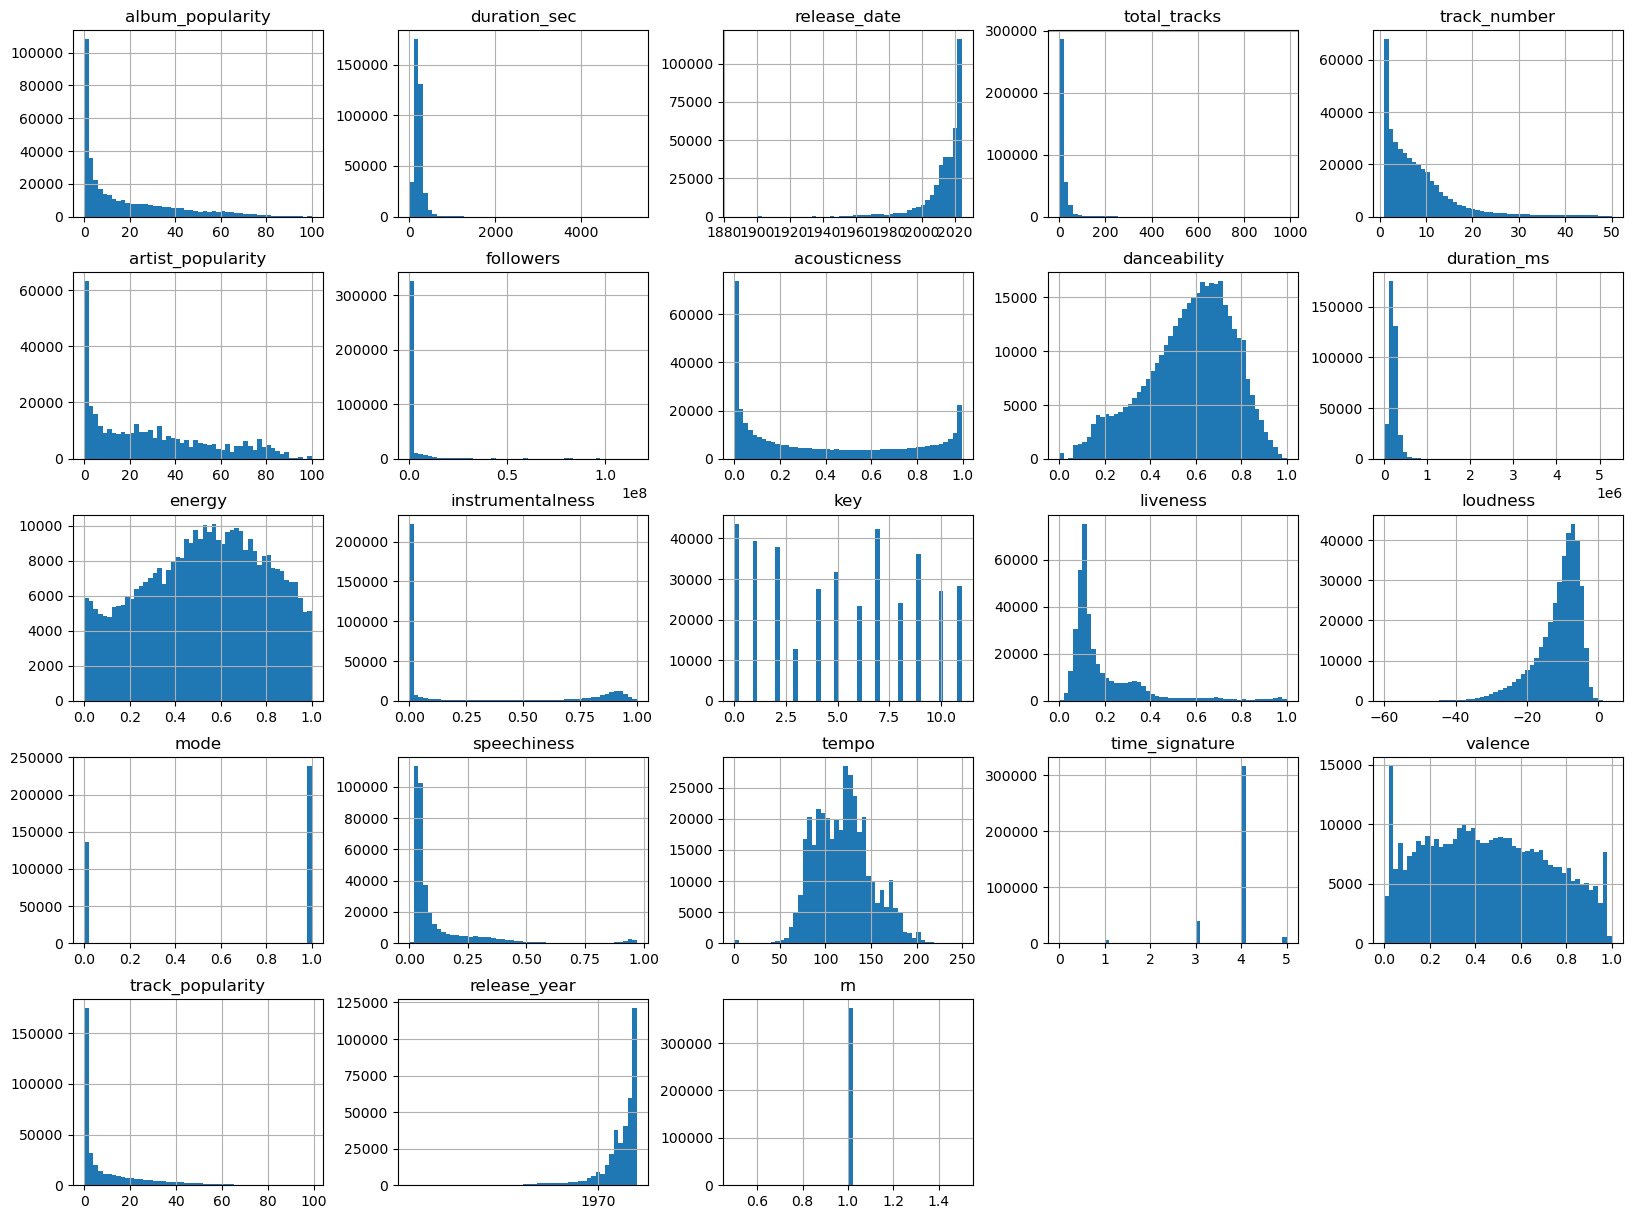

In [134]:
# let's take a further look at Noisness and type of noise (Stochastic, outliers, rounidng errors, etc.)
# Type of distribution (Gaussian, uniform, logaritmic)
df.hist(bins=50, figsize=(20,15))
plt.show()

We indeed see that many histograms are either skewed right, implying that they extend much farther to the right of the median than to the left. This can make it hard for our machine learning algortihms to detect patterns. 

Some also looks like a log-normal distribution



In [ ]:
#Let's take a look and see if we can identify noise. 
#box plots can help identify outliers, 
#scatter plots can help identify random error or other patterns.

# For a box plot
plt.boxplot(df['artist_popularity'])
plt.show()

# For a scatter plot
plt.scatter(df['artist_popularity'], df['column_name2'])
plt.show()

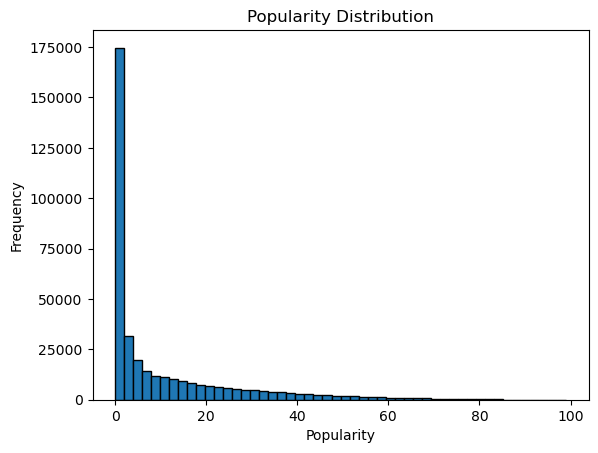

In [17]:
plt.hist(df['track_popularity'], bins=50, edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

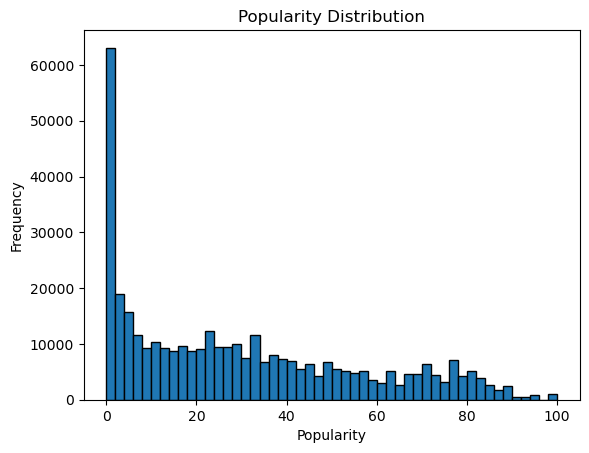

In [135]:
plt.hist(df['artist_popularity'], bins=50, edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

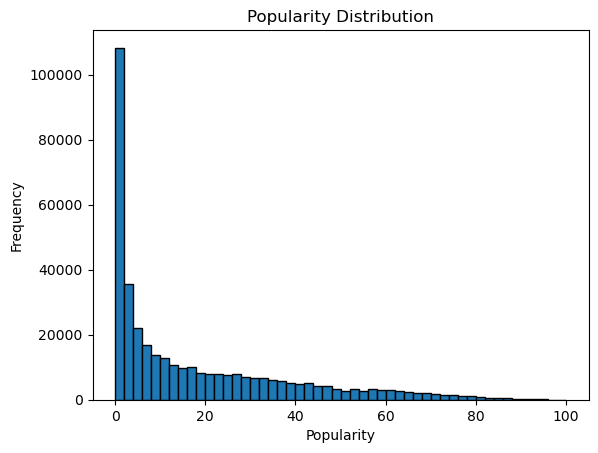

In [136]:
plt.hist(df['album_popularity'], bins=50, edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()